In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

/home/anz/anaconda3/envs/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen(num_train=1000,num_feature=5):
    gen_graph =  tf.Graph()
    with gen_graph.as_default():
        w = tf.random_normal([num_feature,1])
        b = tf.Variable(np.random.rand())
        x = tf.random_normal(shape=[num_train,num_feature])
        y = tf.matmul(x,w)+b
    with tf.Session(graph=gen_graph) as sess:
        sess.run(tf.global_variables_initializer())
        x,y,w,b =sess.run([x,y,w,b])
        return x,y,w,b

In [3]:
# X : matrix mxn
# w : matrix nx1
# y : matrix mx1
# b : scalar
def linreg(x,y,batch_size=64,lr=0.01,epoches=1000):
    num_train = x.shape[0]
    num_feature = x.shape[1]
    losses = []
    w = tf.Variable(tf.zeros([num_feature,1]))
    b = tf.Variable(np.random.rand())
    x_t = tf.placeholder(tf.float32,shape=[None,num_feature])
    y_true = tf.placeholder(tf.float32,shape=[None,1])
    y_t = tf.matmul(x_t,w)+b
    loss = 0.5 * tf.reduce_mean(tf.square(y_t-y_true),0)
    update_w = w.assign(tf.subtract(w,tf.matmul(tf.transpose(x_t),(y_t-y_true))*(1.0/num_train)*lr))
    update_b = b.assign(tf.subtract(b,tf.reduce_mean(y_t-y_true)*lr))
    with tf.Session(graph=tf.get_default_graph()) as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epoches):
            for i in range(math.floor(num_train/batch_size)):
                _loss,_w,_b,_x,_u,_b=sess.run([loss,w,b,x_t,update_w,update_b],feed_dict={x_t : x[batch_size*i:batch_size*(i+1),],y_true : y[batch_size*i:batch_size*(i+1),]})
            if epoch%50==0:
                print()
                print("Epoch {} : Loss {}".format(epoch,_loss))
            losses.append(_loss)
    plt.plot(losses)
    plt.show()
    print('Prediction w ',_w)
    print('Prediction b ',_b)
        
        


Epoch 0 : Loss [1.6268545]

Epoch 50 : Loss [0.6450361]

Epoch 100 : Loss [0.2745439]

Epoch 150 : Loss [0.11754863]

Epoch 200 : Loss [0.05057455]

Epoch 250 : Loss [0.02184522]

Epoch 300 : Loss [0.00946571]

Epoch 350 : Loss [0.00411218]

Epoch 400 : Loss [0.00179]

Epoch 450 : Loss [0.00078046]

Epoch 500 : Loss [0.0003407]

Epoch 550 : Loss [0.00014888]

Epoch 600 : Loss [6.510094e-05]

Epoch 650 : Loss [2.848513e-05]

Epoch 700 : Loss [1.2471392e-05]

Epoch 750 : Loss [5.463006e-06]

Epoch 800 : Loss [2.3933073e-06]

Epoch 850 : Loss [1.0480626e-06]

Epoch 900 : Loss [4.5924142e-07]

Epoch 950 : Loss [2.0250886e-07]


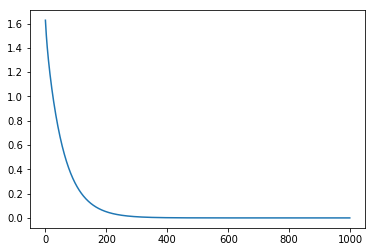

Prediction w  [[-0.73399097]
 [-0.9218823 ]
 [-0.01641436]
 [-1.360905  ]
 [-0.60123837]]
Prediction b  0.5704839
Real w values  [[-0.7342744 ]
 [-0.9221166 ]
 [-0.01646185]
 [-1.3610532 ]
 [-0.6013871 ]]
Real b values  0.57048875


In [4]:
x,y,w,b=gen()
linreg(x,y)
print('Real w values ',w)
print('Real b values ',b)